In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from model import regression
from sklearn.model_selection import train_test_split
from data_loader import load_house_attributes
from data_sources import source_choice
from processing_attributes import process_house_attributes

In [2]:
df = source_choice()

In [3]:
df_paris = load_house_attributes(df)

In [4]:
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189330 entries, 0 to 313775
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   No disposition             189330 non-null  int32         
 1   Date mutation              189330 non-null  datetime64[ns]
 2   Nature mutation            189330 non-null  object        
 3   Valeur fonciere            189330 non-null  float64       
 4   Type de voie               189330 non-null  object        
 5   Code postal                189330 non-null  float64       
 6   Commune                    189330 non-null  object        
 7   Code departement           189330 non-null  object        
 8   Code commune               189330 non-null  int32         
 9   Section                    189330 non-null  object        
 10  Nombre de lots             189330 non-null  int32         
 11  Type local                 189330 non-null  object       

In [5]:
df_paris.describe()

,No disposition,Valeur fonciere,Code postal,Code commune,Nombre de lots,Surface reelle bati,Nombre pieces principales,year,months,day
count,189330.000000,1.893300e+05,189330.000000,189330.000000,189330.000000,189330.00000,189330.000000,189330.000000,189330.000000,189330.000000
mean,1.010278,7.779812e+05,75013.377970,113.377970,1.587704,52.67217,2.387250,2017.972825,6.715101,16.759600
std,0.197138,1.232099e+06,4.861836,4.861836,0.882571,39.84990,1.287827,1.370766,3.420651,8.885482
min,1.000000,1.001000e+03,75001.000000,101.000000,0.000000,5.00000,1.000000,2016.000000,1.000000,1.000000
25%,1.000000,2.500000e+05,75010.000000,110.000000,1.000000,27.00000,1.000000,2017.000000,4.000000,9.000000
50%,1.000000,4.185855e+05,75015.000000,115.000000,2.000000,42.00000,2.000000,2018.000000,7.000000,17.000000
75%,1.000000,7.424575e+05,75017.000000,117.000000,2.000000,66.00000,3.000000,2019.000000,10.000000,25.000000
max,24.000000,1.000000e+07,75020.000000,120.000000,27.000000,716.00000,12.000000,2020.000000,12.000000,31.000000


In [6]:
df_paris['Commune'].value_counts()

PARIS 18    21166
PARIS 15    19093
PARIS 17    16444
PARIS 16    16263
PARIS 11    15049
PARIS 20    12441
PARIS 19    11368
PARIS 14    10057
PARIS 12    10031
PARIS 10    10023
PARIS 13     8761
PARIS 09     6860
PARIS 07     5253
PARIS 06     4892
PARIS 05     4769
PARIS 08     4374
PARIS 03     4324
PARIS 04     3079
PARIS 02     2997
PARIS 01     2086
Name: Commune, dtype: int64

<Figure size 720x720 with 0 Axes>

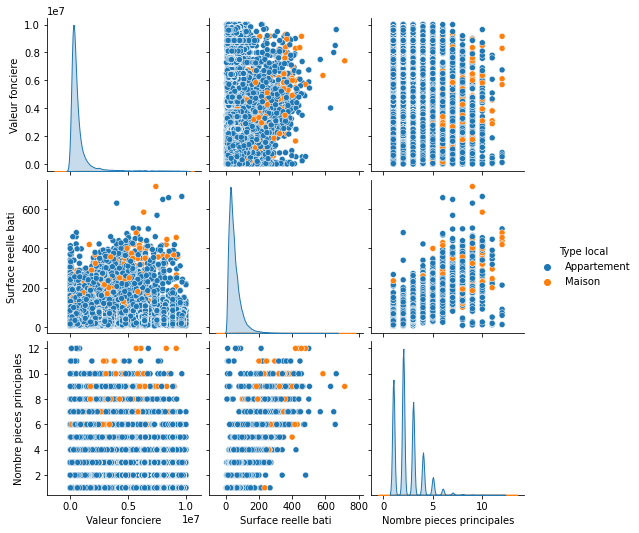

In [7]:
plt.figure(figsize=(10, 10))
sns.pairplot(df_paris[['Valeur fonciere', 'Surface reelle bati', 'Nombre pieces principales', 'Type local']],
             hue='Type local')

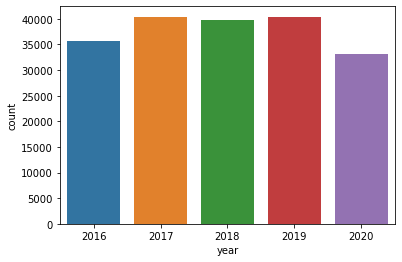

In [8]:
sns.countplot(x="year", data=df_paris)

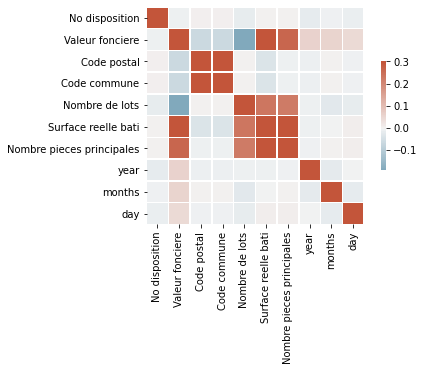

In [9]:
corr = df_paris.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
train, test = train_test_split(df_paris, test_size=0.2, random_state=42)

In [7]:
print('Training Shape:', train.shape)
print('Testing Shape:', test.shape)

Training Shape: (151464, 17)
Testing Shape: (37866, 17)


In [9]:
train_x, test_x = process_house_attributes(df_paris, train, test)

In [10]:
train_y = train["Valeur fonciere"]
test_y = test["Valeur fonciere"]

In [12]:
regr = regression(train_x, train_y)

months 3.3
day 1.2
No disposition 4.9
Nombre de lots 0.1
Surface reelle bati 0.3
Nombre pieces principales 1.0
Commune 0.4
Type local 69.8
Section 19.1
Type de voie 0.0


In [13]:
"""Les critères les plus importants pour prédire la valeur d'un bien à Paris sont le quartier (section) et le type de bien, la saisonnalité ou le nombre de pièce n'influencent pas le modèle"""

"Les critères les plus importants pour prédire la valeur d'un bien à Paris sont le quartier (section) et le type de bien, la saisonnalité ou le nombre de pièce n'influencent pas le modèle"

In [15]:
prediction_regr = regr.predict(test_x)
errors_regr = abs(prediction_regr - test_y)
print('Mean Absolute Error regr:', round(np.mean(errors_regr), 2), 'euros.')

Mean Absolute Error regr: 318094.43 euros.


In [20]:
'''Notre model n'est pas performant car il n'y a pas assez de données et certaines données n'ont pas pu être correctement exploitées (Surface et nb de pièce qui sont très corrélées)'''

"Notre model n'est pas performant car il n'y a pas assez de données et certaines données n'ont pas pu être correctement exploitées (Surface et nb de pièce qui sont très corrélées)"